# Test the library

## modify_functions

In [3]:
from src.modify_functions import *

### Configuration Parameters

In [2]:
import os 
ROOT_PATH = os.path.dirname(os.path.abspath('__file__'))

In [4]:
config_path = os.path.join(ROOT_PATH, "config.yaml")

In [5]:
import yaml
config = yaml.safe_load(open(config_path))

## precheck_metrics

### Precheck with Simulation Datasets

In [6]:
from src.precheck_metrics import *

In [7]:
normal_con = simulate_datasets('normal_continuous')

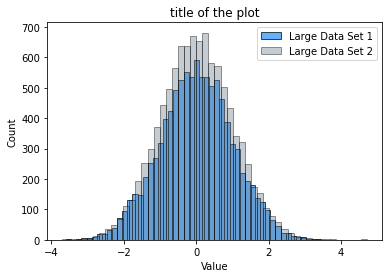

In [8]:
visual_two_simulate_dists(normal_con[0],normal_con[1])

In [9]:
actual_func_score(ks_2samp_statistic,normal_con[0],normal_con[1])

Actual ks_2samp_statistic: 0.0082


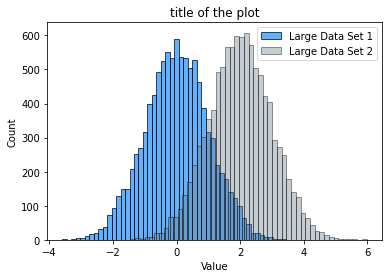

In [10]:
visual_two_simulate_dists(normal_con[0],normal_con[2])

In [11]:
actual_func_score(ks_2samp_statistic,normal_con[0],normal_con[2])

Actual ks_2samp_statistic: 0.685


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  4.63it/s]


{'ks_2samp_statistic': [[0.65075,
   0.6673250000000001,
   0.6771416666666666,
   0.674495],
  [0.6981999999999999, 0.6938799999999999, 0.6876033333333333, 0.68601],
  [0.74, 0.722525, 0.7001916666666667, 0.69624]]}

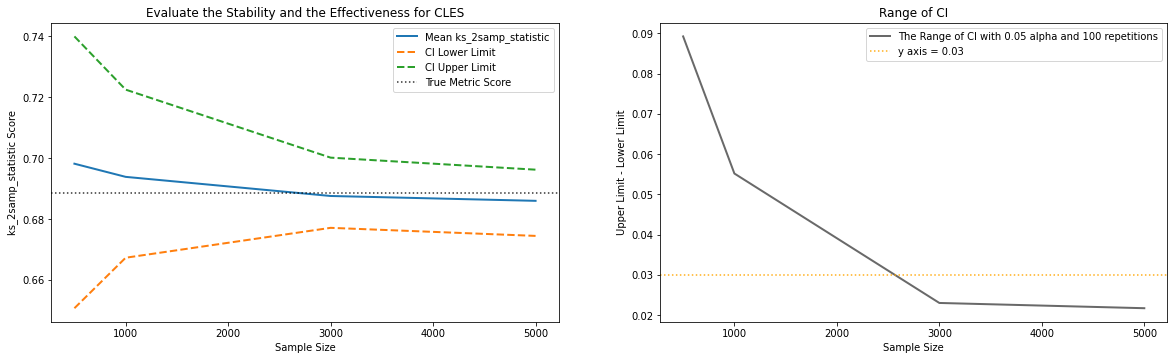

In [12]:
from tqdm import tqdm
two_resample_multifunc_visual(normal_con[0],normal_con[2],
                              'Evaluate the Stability and the Effectiveness for CLES', 
                               0.6887,
                              [500, 1000, 3000, 5000],
                              100, 0.05, 
                              ks_2samp_statistic)

### Precheck with Collected Datasets

In [15]:
data_to_monitor = config['data_to_monitor']
features_filename = config['features_filename']
data_root_path = config['data_root_path']

In [ ]:
# visualize one feature with stratified subsampling 
visual_multihist_distributions(data_root_path, data_to_monitor, features_filename,
                               'feature', 'target', 'group', 
                               42, True, 10000)

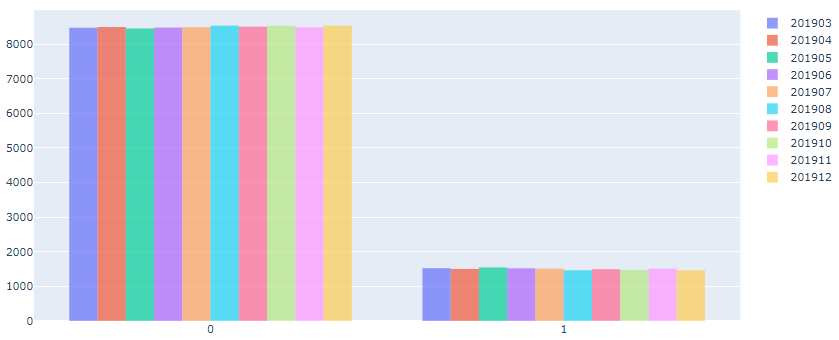

In [16]:
# check dataframes
ft1_201903, ft1_201912 =  stable_multifunc_data(data_root_path, 
                                                '202103', '202112',features_filename,
                                                'target', 'feature1')

In [17]:
ft1_201903.head(2), ft1_201903.shape

(   pct_avg_solde_limit  default
 0             0.000208        0
 1             0.441302        0, (962163, 2))

In [18]:
ft1_201912.head(2), ft1_201912.shape

(   pct_avg_solde_limit  default
 0             0.000208        0
 1             0.394551        0, (910917, 2))

In [19]:
ks_2samp_statistic(ft1_201903['feature1'].values, ft1_201912['feature1'].values)

0.00931478596309343

In [21]:
ft2_201903, ft2_201912 =  stable_multifunc_data(data_root_path, 
                                                '201903', '201912', 
                                                features_filename,
                                                'target', 'feature2')

In [22]:
mwu_2sample_pvalue(ft2_201903['max_del'].values, ft2_201912['max_del'].values)

2.6591591136710085e-191

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [04:16<00:00, 64.20s/it]


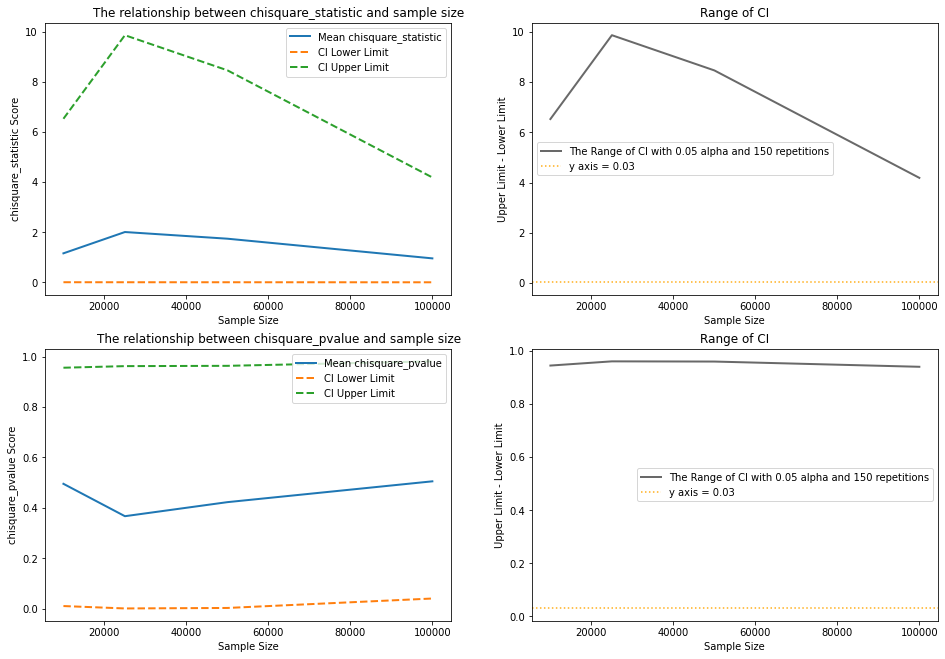

In [23]:
chi2_rangeCI = stable_multifunc_visual_behavior(data_root_path,'201903','201903',features_filename,
                                                True, [10000, 25000, 50000, 100000],
                                                150, 0.05, 42,'default', 'feature',
                                                chisquare_statistic,
                                                chisquare_pvalue)

In [ ]:
effect1size_baseline_multifunc_visual_behavior(data_root_path, '201903', features_filename,
                                               True, 10000, 150, 0.05, 42,
                                              'default', 'feature3',
                                               CLE_Effect_Size)

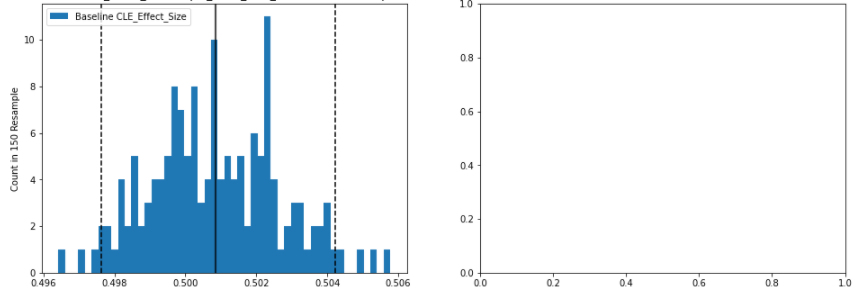

## monitor_scores

In [25]:
import yaml
import os 
from src import monitor_scores

In [26]:
ROOT_PATH = os.path.dirname(os.path.abspath('__file__'))
config_path = os.path.join(ROOT_PATH, "config.yaml")
config = yaml.safe_load(open(config_path))

In [27]:
data_to_monitor = config['data_to_monitor']
features_filename = config['features_filename']
data_root_path = config['data_root_path']

In [ ]:
summary_stats, all_compare_scores = monitor_scores.monitor_behavior_func_pipeline(data_root_path=data_root_path, data_a='201903',
                                                                                  data_b_list=data_to_monitor,
                                                                                  features_filename=features_filename,
                                                                                  stratify=True, func=mwu_2sample_statistic, 
                                                                                  size=200000, repeat_num=150, random_state=42, one_ref_test=False, 
                                                                                  target='target', feature='feature3', alpha=0.05)

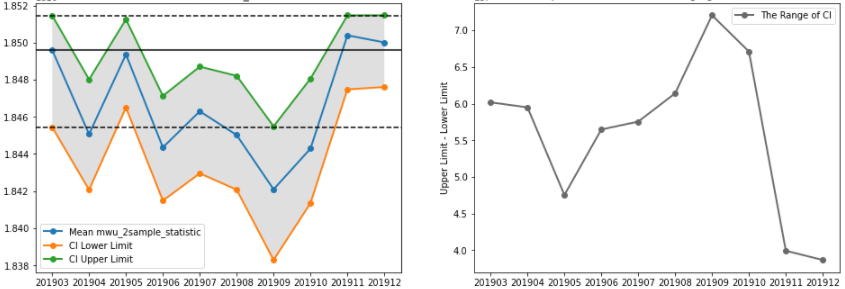